In [1]:
import glob
import os
import sys
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn3_circles
from pylab import *
import seaborn as sns
sns.set()

pd.options.display.max_rows = 30

In [2]:
keywords_chosen = 'Keywords_ECCC_EN.csv'

data_folder = './Accounts/q1_output/*.csv'

OUTPUT_COLS = ['id','date_published','link','caption_original','caption_cleaned','hashtags','num_comments',
               'num_shares','num_likes','Reactions_SUM','matched_keywords','language',
               'average_sentiment_score','sentiment','category',]

In [3]:
# create output directory
outputDir = os.path.dirname(data_folder).replace('q1_output', 'q7_output') + '/'
if not os.path.exists(outputDir):
    os.makedirs(outputDir)

In [4]:
pd.options.display.max_rows = 10
# read csv files and save targt columns to dataframe
filePaths = glob.glob(data_folder)  
data_df = pd.DataFrame(columns=OUTPUT_COLS)
for filename in filePaths:
    print(filename)    
    df_i = pd.read_csv(filename, encoding = 'utf-8')
    data_df = data_df.append(df_i, ignore_index=True)

./Accounts/q1_output/ParksCanada_tweets.csv
./Accounts/q1_output/CanadianAgriculture_facebook_statuses.csv
./Accounts/q1_output/CCG_GCC_tweets.csv
./Accounts/q1_output/FisheriesOceansCanada_facebook_statuses.csv
./Accounts/q1_output/CanadianCoastGuard_facebook_statuses.csv
./Accounts/q1_output/YourMoneyMattersCanada_facebook_statuses.csv
./Accounts/q1_output/EnvironmentandClimateChange_facebook_statuses.csv
./Accounts/q1_output/parks.canada_posts.csv
./Accounts/q1_output/TransportandInfrastructureinCanada_facebook_statuses.csv
./Accounts/q1_output/environmentca_tweets.csv
./Accounts/q1_output/NRCan_tweets.csv
./Accounts/q1_output/ENERGYSTAR_CAN_tweets.csv
./Accounts/q1_output/DFO_Gulf_tweets.csv
./Accounts/q1_output/ec_minister_tweets.csv
./Accounts/q1_output/DFO_Central_tweets.csv
./Accounts/q1_output/DFO_Pacific_tweets.csv
./Accounts/q1_output/DFO_NL_tweets.csv
./Accounts/q1_output/DFO_CCG_Quebec_tweets.csv
./Accounts/q1_output/DFO_Science_tweets.csv
./Accounts/q1_output/Transport_gc

In [5]:
df = data_df[['id', 'date_published','caption_original','matched_keywords','category']]
df = df[~df['category'].str.contains('other')]
df

,id,date_published,caption_original,matched_keywords,category
2,895726583729856513,2017-08-10 19:20:34,Qausuittuq National Park is officially open! L...,"['park', '#arctic']",['Environmental']
5,908858879999713280,2017-09-16 01:03:37,RT @WatertonLakesNP: Thank you to all the crew...,['park'],['Environmental']
8,930060241269673984,2017-11-13 13:10:15,It’s #WorldKindnessDay! It’s so important to b...,"['ecosystem', 'biodiversity']",['Environmental']
9,924335183440109568,2017-10-28 18:00:55,"Baby #bats are called ""pups"" and bats have onl...","['#bats', '#batweek']",['Environmental']
10,911924463461175298,2017-09-24 12:05:09,"Happy #NationalForestWeek! 🌲 All week, we’ll b...",['park'],['Environmental']
...,...,...,...,...,...
45440,2017-10-05_12-41-44,2017-10-05T12:41:44,Be a part of the conversation of a generation....,"['energy', 'future']","['Economical', 'Social']"
45441,2017-10-05_15-22-28,2017-10-05T15:22:28,Join Min Duclos as we discuss a way forward fo...,"['energy', 'future']","['Economical', 'Social']"
45443,2016-12-08_08-45-08,2016-12-08T08:45:08,Funding from Budget will increase charging/ref...,"['funding', 'infrastructure', 'natural', 'gas']","['Economical', 'Environmental']"
45444,2016-12-08_08-20-07,2016-12-08T08:20:07,The Government of Canada approved the Enbridge...,"['government', 'government']","['Economical', 'Environmental']"


In [6]:
col_list = ['Economical', 'Environmental', 'Social']
for col in col_list:
    df[col] = 0
    df.loc[df.category.str.contains(col), col] = 1
df

,id,date_published,caption_original,matched_keywords,category,Economical,Environmental,Social
2,895726583729856513,2017-08-10 19:20:34,Qausuittuq National Park is officially open! L...,"['park', '#arctic']",['Environmental'],0,1,0
5,908858879999713280,2017-09-16 01:03:37,RT @WatertonLakesNP: Thank you to all the crew...,['park'],['Environmental'],0,1,0
8,930060241269673984,2017-11-13 13:10:15,It’s #WorldKindnessDay! It’s so important to b...,"['ecosystem', 'biodiversity']",['Environmental'],0,1,0
9,924335183440109568,2017-10-28 18:00:55,"Baby #bats are called ""pups"" and bats have onl...","['#bats', '#batweek']",['Environmental'],0,1,0
10,911924463461175298,2017-09-24 12:05:09,"Happy #NationalForestWeek! 🌲 All week, we’ll b...",['park'],['Environmental'],0,1,0
...,...,...,...,...,...,...,...,...
45440,2017-10-05_12-41-44,2017-10-05T12:41:44,Be a part of the conversation of a generation....,"['energy', 'future']","['Economical', 'Social']",1,0,1
45441,2017-10-05_15-22-28,2017-10-05T15:22:28,Join Min Duclos as we discuss a way forward fo...,"['energy', 'future']","['Economical', 'Social']",1,0,1
45443,2016-12-08_08-45-08,2016-12-08T08:45:08,Funding from Budget will increase charging/ref...,"['funding', 'infrastructure', 'natural', 'gas']","['Economical', 'Environmental']",1,1,0
45444,2016-12-08_08-20-07,2016-12-08T08:20:07,The Government of Canada approved the Enbridge...,"['government', 'government']","['Economical', 'Environmental']",1,1,0


In [7]:

econ = set(df[df['Economical'] == 1].id)
env = set(df[df['Environmental'] == 1].id)
soc = set(df[df['Social'] == 1].id)

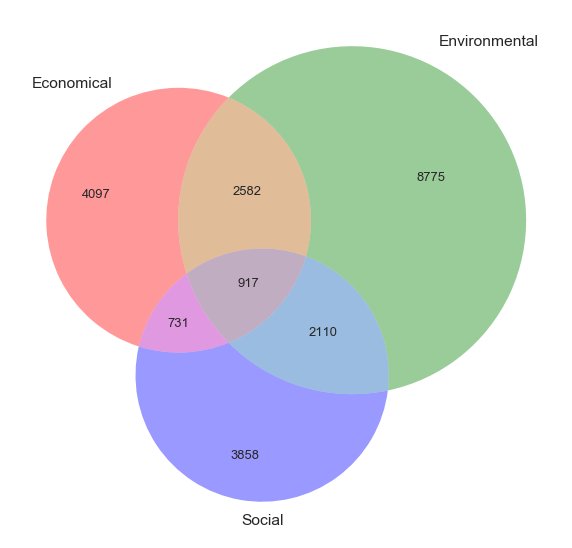

In [8]:
plt.clf()
plt.figure(figsize=(10,10))
rcParams['font.size'] = 13
venn3([econ, env, soc], ('Economical', 'Environmental', 'Social'))
plt.savefig(outputDir + 'q7_venn_diagram_EN.png')
plt.show()